In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read my database from openpowerlifting .csv
df = pd.read_csv(r'C:\Users\rbenoist\Desktop\data\IPF\openipf-2022-05-25\openipf-2022-05-25-a962ee1b.csv')

c:\Users\rbenoist\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (33,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098410 entries, 0 to 1098409
Data columns (total 41 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Name              1098410 non-null  object 
 1   Sex               1098410 non-null  object 
 2   Event             1098410 non-null  object 
 3   Equipment         1098410 non-null  object 
 4   Age               794225 non-null   float64
 5   AgeClass          831464 non-null   object 
 6   BirthYearClass    843441 non-null   object 
 7   Division          1097464 non-null  object 
 8   BodyweightKg      1085522 non-null  float64
 9   WeightClassKg     1087715 non-null  object 
 10  Squat1Kg          403810 non-null   float64
 11  Squat2Kg          399528 non-null   float64
 12  Squat3Kg          389005 non-null   float64
 13  Squat4Kg          322 non-null      float64
 14  Best3SquatKg      786055 non-null   float64
 15  Bench1Kg          584541 non-null   float64
 16  

In [3]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Karen Thomson,F,SBD,Single-ply,39.5,35-39,40-49,Masters 1,51.90,52,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
1,Deborah Groves,F,SBD,Single-ply,30.5,24-34,24-39,Open,50.64,52,...,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
2,Renee Orbon,F,SBD,Single-ply,31.5,24-34,24-39,Open,55.76,56,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
3,Rikki Flanders,F,SBD,Single-ply,31.5,24-34,24-39,Open,56.42,60,...,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
4,Julie Hallmond,F,SBD,Single-ply,NaN,NaN,50-59,Masters 2,58.20,60,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships


In [4]:
n_athlete = 10
mode = "national" #national
sex = "F" #M
equipment = "Raw"
event = "SBD"
country = "France"
federation_1 = "FFForce"
federation_2 = "IPF"
federation_3 = "EPF"
forbidden_division = "Prime Time"
end_date = "2023-01-01"

In [5]:
# Filter my table to get female 47 open FFF

if sex == "F" :
    cate = "47"
else :
    cate = "59"

if mode == "national" :
    df1 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df1 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]


# Group by my table to take the max Goodlift per Athlete Name
df1 = df1.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top 10 of my table
df1 = df1.head(n_athlete)
df1

,Name,Goodlift
45,Tiffany Chapon,116.12
37,Noémie Allabert,104.62
42,Stéphanie Legard,101.62
2,Andréa Zicaro,92.38
3,Bénédicte LePanse,92.00
36,Nathalie Piantino,84.96
28,Marianne Bouvard,84.72
46,Yvelise Martin,83.87
35,Nathalie Feraud,81.95
16,Fitia Rakotoarisoa,81.79


In [6]:
# Filter my table to get female 52 open FFF

if sex == "F" :
    cate = "52"
else :  
    cate = "66"

if mode == "national" :
    df2 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df2 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df2 = df2.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top 10 of my table
df2 = df2.head(n_athlete)
df2

,Name,Goodlift
127,Tiffany Chapon,114.02
111,Noémie Allabert,112.61
123,Shizuka Rico,112.24
20,Camille Hadrys,102.17
65,Laurie Julien,98.78
4,Alison Huet,98.48
11,Anna Maramotti,95.31
72,Lorraine Balbiani,91.17
98,Maëva Lambert,90.56
126,Stéphanie Legard,88.44


In [7]:
# Filter my table to get female 57 open FFF

if sex == "F" :
    cate = "57"
else :
    cate = "74"

if mode == "national" :
    df3 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df3 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df3 = df3.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top 10 of my table
df3 = df3.head(n_athlete)
df3

,Name,Goodlift
88,Jade Jacob,110.38
197,Océane Regis,104.08
36,Caroline Suné,99.39
215,Sovannphaktra Pal,98.14
2,Agnès Alves,96.85
179,Mélodie Anthouard,95.36
130,Léa Gratacos,93.34
177,Mélanie Pagesy,91.62
160,Marina Soyer-Bardi,90.45
20,Anna Maramotti,89.88


In [8]:
# Filter my table to get female 63 open FFF

if sex == "F" :
    cate = "63"
else :
    cate = "83"

if mode == "national" :
    df4 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df4 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df4 = df4.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top 10 of my table
df4 = df4.head(n_athlete)
df4

,Name,Goodlift
237,Prescillia Bavoil,120.07
245,Samantha Eugenie,110.35
162,Ludivine Delos,102.57
197,Mathilde Rosset,97.32
38,Caroline Suné,95.49
214,Mélodie Anthouard,94.58
224,Océane Regis,92.67
129,Justine Jouve,91.53
196,Mathilde Pataille,91.51
118,Johanna Huette,91.39


In [9]:
# Filter my table to get female 69 open FFF

if sex == "F" :
    cate = "69"
else : 
    cate = "93"

if mode == "national" :
    df5 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df5 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df5 = df5.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top 10 of my table
df5 = df5.head(n_athlete)
df5

,Name,Goodlift
38,Prescillia Bavoil,118.10
11,Clara Peyraud,101.08
36,Pauline Le Bras,95.88
2,Andorina Bouchoux,95.10
5,Camille Pailha,85.80
19,Isoline Berger,81.53
18,Haingotiana Rasamimanantsoa,81.44
37,Philae Falchi,80.30
10,Clara Kaminski,79.32
28,Ludivine Breymand,79.27


In [10]:
# Filter my table to get female 76 open FFF

if sex == "F" :
    cate = "76"
else :  
    cate = "105"

if mode == "national" :
    df6 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df6 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df6 = df6.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top 10 of my table
df6 = df6.head(n_athlete)
df6

,Name,Goodlift
25,Laura Mautalen,106.32
5,Clara Peyraud,102.95
27,Margot Concolato,87.39
2,Angeline Berva,79.24
4,Christelle Mouandjo,78.74
20,Jessica Doorhyee,77.60
17,France Juilien,74.87
9,Elisa Elleuch,70.18
24,Laura Barko,69.22
16,France Collinot,69.02


In [11]:
# Filter my table to get female 84 open FFF

if sex == "F" :
    cate = "84"
else :
    cate = "120"

if mode == "national" :
    df7 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df7 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df7 = df7.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top 10 of my table
df7 = df7.head(n_athlete)
df7

,Name,Goodlift
30,Kelly Millecamps,97.53
36,Lea Schreiner,86.28
25,Innès Allouache,85.20
45,Margot Concolato,83.73
7,Angeline Berva,83.51
50,Marion Attelly,79.48
28,Julie Franch Guerra,77.99
18,Cécile Brotons,73.86
13,Christelle Mouandjo,73.75
23,France Collinot,73.14


In [12]:
# Filter my table to get female 84+ open FFF

if sex == "F" :
    cate = "84+"
else :
    cate = "120+"

if mode == "national" :
    df8 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_1)
            |
            (df['Federation'] == federation_2) & (df['Country'] == country)
            |
            (df['Federation'] == federation_3) & (df['Country'] == country)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]
else :
    df8 = df.loc[
        (df['Sex'] == sex)
        & 
        (df['WeightClassKg'] == cate)
        & 
        (df['Equipment'] == equipment)
        & 
        (df['Event'] == event)
        &
        (
            (df['Federation'] == federation_2)
            |
            (df['Federation'] == federation_3)
        )
        &
        (df['Division'] != forbidden_division)
        &
        (df['Date'] < end_date)
    ]

# Group by my table to take the max Goodlift per Athlete Name
df8 = df8.groupby('Name')['Goodlift'].max().reset_index().sort_values(['Goodlift'], ascending=False) 

# Plot the top 10 of my table
df8 = df8.head(n_athlete)
df8

,Name,Goodlift
0,Amélie Mierger,108.24
22,Rachelle Letaief,75.92
8,Cindy Hebe,73.01
6,Camille Dezier,72.46
16,Marie Stéphanie Vili,69.40
3,Atonina Vehikite,69.10
12,Jennifer Bailleul,67.65
5,Camellia Messaoui,66.76
1,Angélique Lafont,66.02
15,Léonie Letissier,64.62


In [13]:
with pd.ExcelWriter(r"C:\Users\rbenoist\Desktop\data\IPF\results.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    df1.to_excel(writer, header="47", sheet_name="47")
    df2.to_excel(writer, sheet_name="52")
    df3.to_excel(writer, sheet_name="57")
    df4.to_excel(writer, sheet_name="63")
    df5.to_excel(writer, sheet_name="69")
    df6.to_excel(writer, sheet_name="76")
    df7.to_excel(writer, sheet_name="84")
    df8.to_excel(writer, sheet_name="84+")

([<matplotlib.axis.XTick at 0x1cf801c0ca0>,
 [Text(1, 0, '47'),
  Text(2, 0, '52'),
  Text(3, 0, '57'),
  Text(4, 0, '63'),
  Text(5, 0, '69'),
  Text(6, 0, '76'),
  Text(7, 0, '84'),
  Text(8, 0, '84+')])

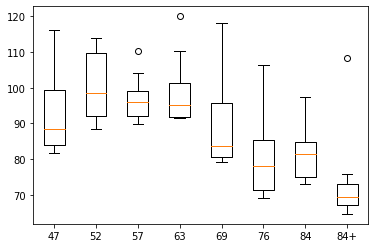

In [14]:
if sex == "F" :
    bars = ['47', '52', '57', '63', '69', '76', '84', '84+']
else :
    bars = ['59', '66', '74', '83', '93', '105', '120', '120+']


x_pos = np.arange(len(bars))

plt.boxplot(
    [
    df1['Goodlift'],
    df2['Goodlift'],
    df3['Goodlift'],
    df4['Goodlift'],
    df5['Goodlift'],
    df6['Goodlift'],
    df7['Goodlift'],
    df8['Goodlift']
    ]
)

plt.xticks([1, 2, 3, 4, 5 , 6, 7 , 8], bars)

([<matplotlib.axis.XTick at 0x1cf8035b790>,
 [Text(1, 0, '47'),
  Text(2, 0, '52'),
  Text(3, 0, '57'),
  Text(4, 0, '63'),
  Text(5, 0, '69'),
  Text(6, 0, '76'),
  Text(7, 0, '84'),
  Text(8, 0, '84+')])

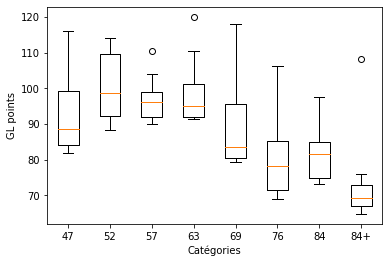

In [15]:
plt.boxplot(
    [
    df1['Goodlift'],
    df2['Goodlift'],
    df3['Goodlift'],
    df4['Goodlift'],
    df5['Goodlift'],
    df6['Goodlift'],
    df7['Goodlift'],
    df8['Goodlift']
    ]
)
plt.ylabel('GL points')
plt.xlabel('Catégories')
plt.xticks([1, 2, 3, 4, 5 , 6, 7 , 8], bars)

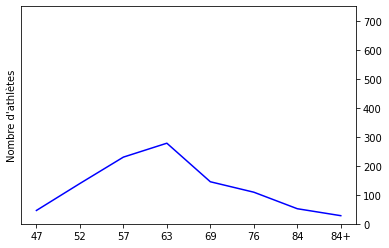

In [16]:
n_cate = np.array([46, 139, 230, 278, 145, 109, 52, 28])

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

plt.ylim([0, 750])
plt.ylabel("Nombre d'athlètes")
t = plt.ylabel("Nombre d'athlètes");
t.Color = 'red'
plt.plot(bars, n_cate, color = 'blue')


([<matplotlib.axis.XTick at 0x1cf805beaf0>,
 [Text(1, 0, '47'),
  Text(2, 0, '52'),
  Text(3, 0, '57'),
  Text(4, 0, '63'),
  Text(5, 0, '69'),
  Text(6, 0, '76'),
  Text(7, 0, '84'),
  Text(8, 0, '84+')])

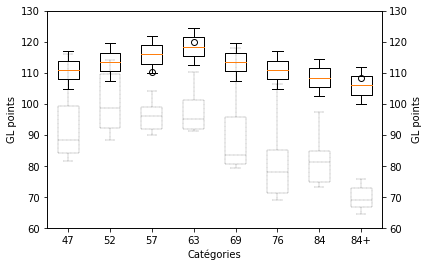

In [17]:
plt.boxplot(
    [
    df1['Goodlift'],
    df2['Goodlift'],
    df3['Goodlift'],
    df4['Goodlift'],
    df5['Goodlift'],
    df6['Goodlift'],
    df7['Goodlift'],
    df8['Goodlift']
    ], 
    boxprops= dict(linestyle='--',linewidth=0.25, color='black'),
    whiskerprops=dict(linestyle='--',linewidth=0.25, color='black'),
    medianprops = dict(linestyle='--', linewidth=0.25, color='black'),
    capprops = dict(linestyle='--', linewidth=0.25, color='black'),
    flierprops = dict(linestyle='--', linewidth=0.25, color='black')
)
plt.ylim([60, 130])
plt.ylabel('GL points')
plt.xlabel('Catégories')
plt.xticks([1, 2, 3, 4, 5 , 6, 7 , 8], bars)


# both boxplot
plt.twinx()
a = np.arange(105, 117.5, 1).tolist()
b = np.arange(107.5, 120, 1).tolist()
c = np.arange(110, 122.5, 1).tolist()
d = np.arange(112.5, 125, 1).tolist()
e = np.arange(107.5, 120, 1).tolist()
f = np.arange(105, 117.5, 1).tolist()
g = np.arange(102.5, 115, 1).tolist()
h = np.arange(100, 112.5, 1).tolist()
plt.boxplot(
    [
    a,
    b,
    c,
    d,
    e,
    f,
    g,
    h
    ], widths = 0.5
)
plt.ylim([60, 130])
plt.ylabel('GL points')
plt.xlabel('Catégories')
plt.xticks([1, 2, 3, 4, 5 , 6, 7 , 8], bars)

{'whiskers': [<matplotlib.lines.Line2D at 0x1cf80fbe040>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf80fbe760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf80fadd90>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf80fbeeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf80fc8280>],
 'means': []}

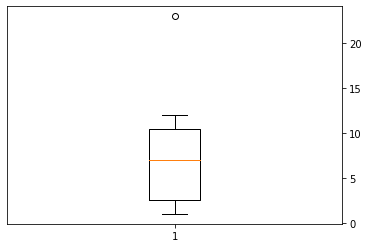

In [18]:
plt.boxplot([1,2,3,7,9,12,23])

([<matplotlib.axis.XTick at 0x1cf80fed8b0>,
 [Text(1, 0, '47'),
  Text(2, 0, '52'),
  Text(3, 0, '57'),
  Text(4, 0, '63'),
  Text(5, 0, '69'),
  Text(6, 0, '76'),
  Text(7, 0, '84'),
  Text(8, 0, '84+')])

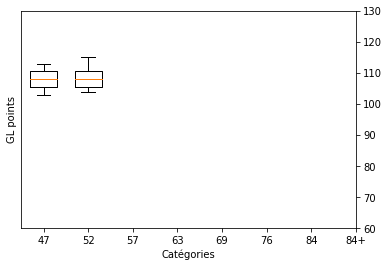

In [19]:
a = [103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113]
b = [104, 104, 105, 106, 107, 108, 109, 110, 111, 112, 115]
plt.boxplot(
    [
    a,
    b
    ]
    , widths = 0.6
)
plt.ylim([60, 130])
plt.ylabel('GL points')
plt.xlabel('Catégories')
plt.xticks([1, 2, 3, 4, 5 , 6, 7 , 8], bars)